In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib notebook

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df = df[['borough', 'major_category', 'minor_category']]
df = df.groupby(['borough', 'major_category', 'minor_category']).size().reset_index()
df = pd.pivot_table(df, index=['borough'], columns=['major_category', 'minor_category'])
df = df.iloc[7].reset_index()
del df['level_0']
df = df.pivot_table('Croydon', ['major_category', 'minor_category'])
df

Croydon
major_category              minor_category                                 
Burglary                    Burglary in Other Buildings              1780.0
                            Burglary in a Dwelling                   1781.0
Criminal Damage             Criminal Damage To Dwelling              1858.0
                            Criminal Damage To Motor Vehicle         1846.0
                            Criminal Damage To Other Building        1742.0
                            Other Criminal Damage                    1824.0
Drugs                       Drug Trafficking                         1756.0
                            Other Drugs                               495.0
                            Possession Of Drugs                      1892.0
Fraud or Forgery            Counted per Victim                        479.0
                            Other Fraud & Forgery                     209.0
Other Notifiable Offences   Going Equipped                            515.0
                            Other Notifiable                         1813.0
Robbery                     Business Property                        1573.0
                            Personal Property                        1821.0
Sexual Offences             Other Sexual                              260.0
                            Rape                                      176.0
Theft and Handling          Handling Stolen Goods                    1361.0
                            Motor Vehicle Interference & Tampering   1913.0
                            Other Theft                              1863.0
                            Other Theft Person                       1787.0
                            Theft From Motor Vehicle                 1872.0
                            Theft From Shops                         1227.0
                            Theft/Taking Of Motor Vehicle            1864.0
                            Theft/Taking of Pedal Cycle              1808.0
Violence Against the Person Assault with Injury                      1803.0
                            Common Assault                           1889.0
                            Harassment                               1880.0
                            Murder                                    332.0
                            Offensive Weapon                         1684.0
                            Other violence                           1761.0
                            Wounding/GBH                             1778.0

In [3]:
facecolor = '#eaeaf2'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
labels = ['Burglary','Criminal Damage','Drugs','Fraud or Forgery' ,'Other Notifiable Offences','Robbery','Sexual Offences','Theft and Handling','Violence Against the Person']
size = 0.3
vals = df['Croydon']
group_sum = df.groupby('major_category')['Croydon'].sum()

<IPython.core.display.Javascript object>


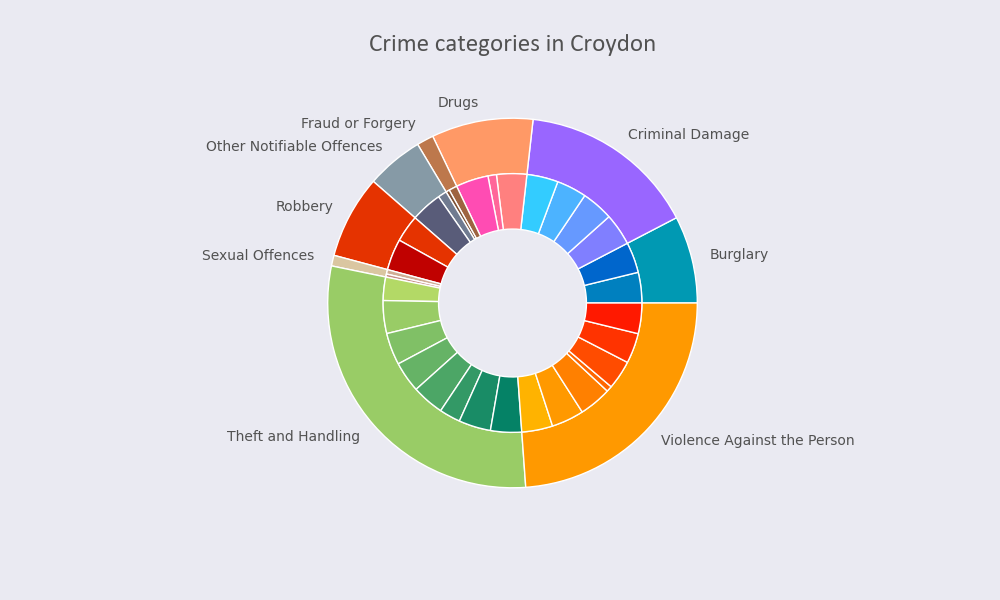

Text(0.5, 1.0, 'Crime categories in Croydon')

In [4]:
fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)

a,b,c,d,e,f,g,h,i = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone, 
                     plt.cm.gist_heat, plt.cm.pink, plt.cm.summer, plt.cm.autumn]

outer_colors = [a(.6), b(.6), c(.6), d(.6), e(.6), f(.6), g(.6), h(.6), i(.6)]
inner_colors = [a(.5), a(.4), 
                b(.5), b(.4), b(.3), b(.2),
                c(.5), c(.4), c(.3),
                d(.5), d(.4),
                e(.5), e(.4),
                f(.6), f(.5),
                g(.5), g(.4),
                h(.7), h(.6), h(.5), h(.4), h(.3), h(.2), h(.1), h(5),
                i(.7), i(.6), i(.5), i(.4), i(.3), i(.2), i(.1)]

ax.pie(group_sum, 
       radius=1, 
       colors=outer_colors, 
       labels=labels, 
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals, 
       radius=1-size, 
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set_title('Crime categories in Croydon', fontsize=18, pad=15, color=font_color, **hfont)

In [5]:
filename = 'mpl-nested-pie'
plt.savefig(filename+'.png', facecolor=facecolor)